In [9]:
# external pacakges that we need
import os
from time import time
import numpy as np
import discretisedfield as df
import micromagneticmodel as mm
import oommfc as oc
import matplotlib.pyplot as plt
%matplotlib inline

# my own package
from continuous_model.simulator import *
from continuous_model.plot_model import plot_field


In [2]:
# list the ".npy" files
def GetFileList(dir, fileList): 
    if os.path.isfile(dir): 
        print("input must be a dir!")
    elif os.path.isdir(dir):
        for s in os.listdir(dir):
            fileList.append(s)
    fileList = [t for t in fileList if '.npy' in t]
    fileList.remove("final.npy")
    list_final = [str(i+1) + ".npy" for i in range(len(fileList))]
    list_final.append("final.npy")
    return list_final

npy_list = GetFileList('./iterations_40/', [])
print(npy_list)

['1.npy', '2.npy', '3.npy', '4.npy', '5.npy', '6.npy', '7.npy', '8.npy', '9.npy', '10.npy', '11.npy', '12.npy', '13.npy', '14.npy', '15.npy', '16.npy', '17.npy', '18.npy', '19.npy', '20.npy', '21.npy', '22.npy', '23.npy', '24.npy', '25.npy', '26.npy', '27.npy', '28.npy', '29.npy', '30.npy', '31.npy', '32.npy', '33.npy', '34.npy', '35.npy', '36.npy', '37.npy', '38.npy', '39.npy', '40.npy', '41.npy', '42.npy', '43.npy', '44.npy', '45.npy', 'final.npy']


In [43]:
# ans = os.sep.join(('iterations',npy_list[20]))
# print(ans)

In [3]:
# Define several parameters
Ms = 3.84e5
A = 8.78e-12  # A/m
D = 1.58e-3
B = 0.1
mu0 = 4 * np.pi * 1e-7

In [5]:
y_list = []
for i in range(len(npy_list)):
    current_state = np.load(os.sep.join(('iterations_40',npy_list[i])))
    
    nx = current_state.shape[0]
    ny = current_state.shape[1]
    nz = current_state.shape[2]


    my_cool_mesh = RectangularMesh(nx=nx, ny=ny, nz=nz, units=5e-9)
    my_cool_m = m_Field(my_cool_mesh, Ms, current_state)
    
    current_E = Exchange(A=A).energy(my_cool_m) + DMI(D=D).energy(my_cool_m) + Zeeman(H=[0, 0, B/mu0]).energy(my_cool_m)
    y_list.append(current_E)

print(y_list)

[3.523449710163511e-18, 3.4583798509596654e-18, 3.355517571674372e-18, 3.2463424674264243e-18, 3.11430656869069e-18, 2.989059533769614e-18, 2.8309232203489518e-18, 2.635804322733423e-18, 2.4695817937881562e-18, 2.272188430233004e-18, 2.04525620919985e-18, 1.8108918201469776e-18, 1.5846536806099855e-18, 1.3632839129154364e-18, 1.1093148600690049e-18, 8.90191492828338e-19, 6.202681068806054e-19, 3.954310516691387e-19, 1.1075271567037017e-19, -1.5559477038375136e-19, -4.4899418791633225e-19, -7.199240929592175e-19, -1.0120804675179131e-18, -1.3018997734535486e-18, -1.576642327428346e-18, -1.8008467515629303e-18, -2.0681215132733305e-18, -2.3203111244683055e-18, -2.565946308498272e-18, -2.809288968481756e-18, -3.058069314051696e-18, -3.2822197340197574e-18, -3.577720797844888e-18, -3.864609619349617e-18, -4.09820587013906e-18, -4.331282527203107e-18, -4.581644523459542e-18, -4.759749619946783e-18, -5.004630161281766e-18, -5.232132657699788e-18, -5.4410188556781776e-18, -5.65476749823439e-1

In [13]:
# y_list = [i * 10 ** 19 for i in y_list]
# print(y_list)
# print(len(y_list))

In [6]:
x = np.linspace(0, 40000000, 46)
print(len(x))

46


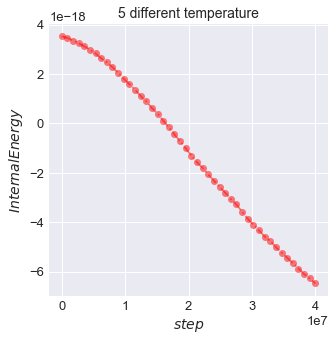

In [7]:
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)

ax1.set_xlabel("$step$", fontsize=14)
ax1.set_ylabel("$Internal Energy$", fontsize=14)
ax1.set_title('5 different temperature', fontsize=14)
ax1.grid(True)

ax1.plot(x, y_list, color='r',marker='o',linestyle='-.',alpha=0.5, label='$2x+3y=7$')
# ax1.plot(x,y2,'r', label='$x-4y=3$')

# ax1.legend(loc='best', fontsize=14)

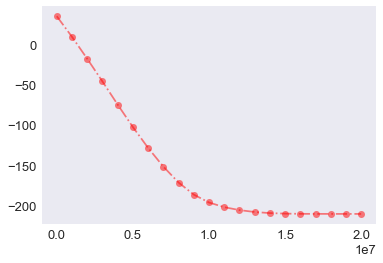

In [7]:
# plt.plot(x,y_list,color='r',marker='o',linestyle='-.',alpha=0.5)
# plt.show()

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体支持

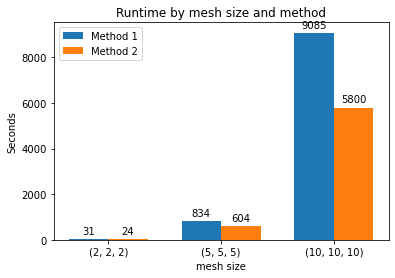

In [2]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['(2, 2, 2)', '(5, 5, 5)', '(10, 10, 10)']
method_1 = [31, 834, 9085]
method_2 = [24, 604, 5800]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, method_1, width, label='Method 1')
rects2 = ax.bar(x + width/2, method_2, width, label='Method 2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('mesh size')
ax.set_ylabel('Seconds')
ax.set_title('Runtime by mesh size and method')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# fig.tight_layout()

plt.show()
